<a href="https://colab.research.google.com/github/ykkim77/nlp_10th_week/blob/main/nlp_10th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Conv1D, Dense, Embedding, MaxPool1D, Flatten
from tensorflow.keras.models import Model

In [5]:
(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words = 500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [17]:
x_train.shape
#0th sentence

print(len(x_train[0]))

#1th sentence
print(len(x_train[1]))

218
189


In [18]:
imdb_index = imdb.get_word_index(path= 'imdb_word_index.json')
imdb_index["<pad>"]= 0
imdb_index["<start>"]= 1
imdb_index["<unk>"]= 2
imdb_index["<unused>"]= 3

1646592/1641221 [==============================] - 0s 0us/step


In [19]:
imdb_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [20]:
imdb_num2vec = {value:key for key,value in imdb_index.items()}

In [ ]:
sent = [imdb_num2vec[index] for index in x_train[0]]

In [23]:
" ".join(sent)

"<start> as you with out <unk> <unk> <unk> <unk> their becomes <unk> had <unk> of lot from anyone to have after out <unk> never more <unk> <unk> it so heart shows to years of every never going <unk> help moments or of every <unk> <unk> movie <unk> her was several of enough more with is now <unk> film as you of <unk> <unk> unfortunately of you than him that with out <unk> her get for was <unk> of you movie <unk> movie that with <unk> but <unk> to story wonderful that in seeing in character to of <unk> <unk> with heart had <unk> they of here that with her <unk> to have does when from why what have <unk> they is you that isn't one will very to as itself with other <unk> in of seen over <unk> for anyone of <unk> br <unk> to <unk> from than out <unk> history he name half some br of <unk> <unk> was two most of mean for 1 any an <unk> she he should is thought <unk> but of script you not while history he heart to real at <unk> but when from one bit then have two of script their with her <unk> 

In [29]:
# pos / neg 개 수 얻기

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

1    12500
0    12500
dtype: int64
1    12500
0    12500
dtype: int64


In [34]:
# 문장 하나당 단어가 얼마나 들어 있는지 확인

x_train_lengths = pd.DataFrame(x_train).applymap(len)
index, counts = np.unique(x_train_lengths, return_counts=True)

2494 11
196 1


,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


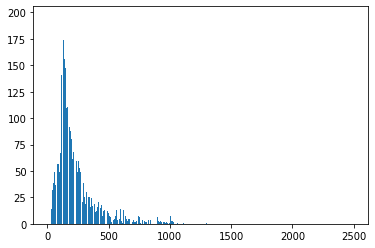

In [40]:
plt.bar(index,counts)
print(max(index), min(index))
print(max(counts), min(counts))
x_train_lengths.describe()

In [41]:
x_test_lengths = pd.DataFrame(x_test).applymap(len)
index, counts = np.unique(x_test_lengths, return_counts=True)

2315 7
184 1


,0
count,25000.000000
mean,230.804200
std,169.164471
min,7.000000
25%,128.000000
50%,174.000000
75%,280.000000
max,2315.000000


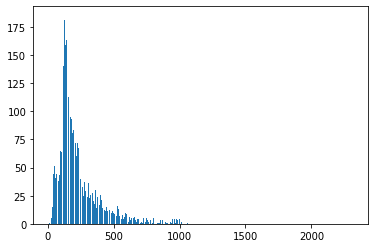

In [43]:
plt.bar(index,counts)
print(max(index), min(index))
print(max(counts), min(counts))
x_test_lengths.describe()

**Data Embedding**

In [46]:
max_len = x_train_lengths.max().values
xtrain_padded = pad_sequences(x_train, maxlen= 300, padding= 'post')
xtest_padded = pad_sequences(x_test, maxlen= 300, padding= 'post')

In [47]:

max(np.max(x_train, axis=None))

497

In [76]:
#input

input = Input(shape=(300))

#embedding layer
layer = Embedding(input_dim= 500, output_dim= 100)(input)

#Block 1

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

#Block 2

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

#Block 3

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

layer = Flatten()(layer)
layer = Dense(15,activation='tanh',kernel_initializer='he_normal')(layer)
layer = Dense(15,activation='tanh',kernel_initializer='he_normal')(layer)
layer = Dense(1,activation='sigmoid')(layer)

output = layer


In [77]:
model = Model(input,output)
model.compile('adam','binary_crossentropy', metrics=['acc'])

**epochs 을 너무 많이 주지 말고, 20 정도만 사용할 것을 권장합니다. (수행 속도가 너무 길어짐)**

In [81]:
model.fit(xtrain_padded,y_train,epochs=1, validation_data=(xtest_padded,y_test))

782/782 [==============================] - 137s 175ms/step - loss: 0.0451 - acc: 0.9864 - val_loss: 0.5870 - val_acc: 0.8425
